In [12]:
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import json

In [ ]:
def split_string(string_to_split, delimiter):
  result_list = []
  tokens = string_to_split.split(delimiter)
  for i in range(len(tokens) - 1):
    result_list.append(tokens[i])
  result_list.append(tokens[len(tokens)-1])
  return  result_list

In [ ]:
#SUCCESSFULLY split text into separate records where each "line" record, saved as json file
myFile = open('comments.txt').read()

newFile = split_string(myFile,"-------------------------------")

for line in newFile:
    line = line.rstrip()
    print(line)
    break


In [ ]:

citation=[]

for line in newFile:
    record={}
    score = re.findall(r'^\n([0-9]+) :',line)
    date= re.findall(r'(20[0-9][0-9]-[0-9][0-9]-[0-9][0-9])\n',line)
    comments= re.findall(r'\n([a-zA-Z].+)\n',line)
    
    try:
        record['Score']=score[0]
    except:
        record['Score']= 1
    
    try:
        record['Date']= date[0]
    except:
        record['Date'] = 'NaN'
        
    try:
        record['Comment'] = comments[0]
    except:
        record['Comment'] = "Deleted"
        
    citation.append(record)


In [ ]:

#Saving to JSON File
with open('comment_processed.txt','w') as outfile:
    json.dump(citation,outfile)

In [13]:
reddit = pd.read_json('comment_processed.txt', orient = 'records')

reddit

,Score,Date,Comment
0,1,2021-02-20,WSB has already become a hive mind in regards ...
1,1,2021-02-20,Everybody knew about a multi trillion dollar d...
2,1,2021-02-20,"They likely are selling puts, not buying them...."
3,1,2021-02-20,Coin plus GME gang
4,1,2021-02-20,I started this year and slowly added throughou...
...,...,...,...
642104,1,2014-11-21,"Don't buy, the trend is clear, more and more v..."
642105,1,2014-03-14,I don't like any form of retail right now. In ...
642106,1,2014-03-14,Wow I do the same thing. I'm looking at buyin...
642107,2,2014-01-02,"Q1 is usually a time when laggards do well, I'..."


In [3]:
# Counting number of '0' in Dates.  These Dates will be removed
reddit = reddit.dropna(thresh = 3)

reddit.count(0)


Score      642012
Date       642012
Comment    642012
dtype: int64

In [4]:
hi_scores = reddit.sort_values('Score',ascending = False)
hi_scores.median()
hi_scores.head(60)

<ipython-input-4-85dd87cd7e81>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  hi_scores.median()


,Score,Date,Comment
98381,71259,2021-02-02,"Supply and Demand, but in this case it literal..."
97911,38179,2021-02-02,The SEC is a mess. I wouldnt trust them to do ...
97072,38084,2021-02-02,During this scary and uncertain time with $GME...
334904,22504,2021-01-28,I'm standing firm with my GME and BB
245013,21549,2021-01-29,Now buy more $GME.
355996,21228,2021-01-28,STILL HOLDING MY GME SHARES.
424626,20724,2021-01-27,SEC I have proof of malfeasance. A group of he...
357435,20005,2021-01-28,"Alright, If you can lose 10 Mil, I can lose $5..."
338195,18279,2021-01-28,"yup, if you bought on margin, they tightened ..."
212069,16332,2021-01-30,Carry on my Retard Sons


In [5]:
#Counting number of 'Deleted' in Authors
deleted_comments = 0
for i in reddit['Comment']:
    if i == 'Deleted':
        deleted_comments +=1

print(deleted_comments)

21395


In [6]:
dates_gb = reddit.groupby("Date")

posts_gb = dates_gb.agg({'Comment': 'count', 'Score':'max'})

posts_gb.rename(columns = {'Comment':'Number of Comments','Score':'Max Score'}, inplace = True)

posts_gb.head(50)

,Number of Comments,Max Score
Date,,
2014-01-02,1,2
2014-03-14,2,1
2014-11-21,1,1
2014-12-10,1,3
2014-12-11,1,1
2015-01-14,1,3
2015-05-28,2,1
2015-05-29,1,2
2015-07-06,1,2


In [8]:
gme = pd.read_csv('GME.csv')
gme=gme.set_index('Date')
gme.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,7.30,7.82,6.77,7.65,7.65,23211000
2020-09-02,7.80,8.05,7.11,7.71,7.71,13011100
2020-09-03,7.88,8.45,7.24,7.82,7.82,14344500
2020-09-04,7.78,7.92,7.17,7.65,7.65,7662000
2020-09-08,7.55,8.28,7.48,7.70,7.70,9816600


In [ ]:
gme['Volume']['2020-12-01':'2021-02-21'].plot(figsize = (12,8))

In [ ]:
gme['Close']['2020-12-01':'2021-02-21'].plot(figsize = (12,8));


NameError: name 'authors_gb' is not defined

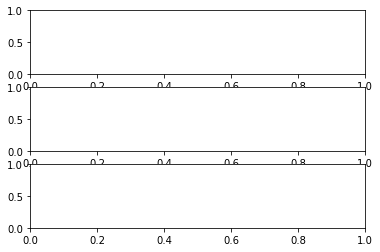

In [10]:
figure, axes = plt.subplots(3,1)
authors_gb['2021-02-21':'2020-12-01'].plot(ax = axes[0],figsize = (12,8));
gme['Volume']['2020-12-01':'2021-02-21'].plot(ax = axes[1],figsize = (12,8));
gme['Close']['2020-12-01':'2021-02-21'].plot(ax = axes[2],figsize = (12,8));


